In [1]:
import pygmt

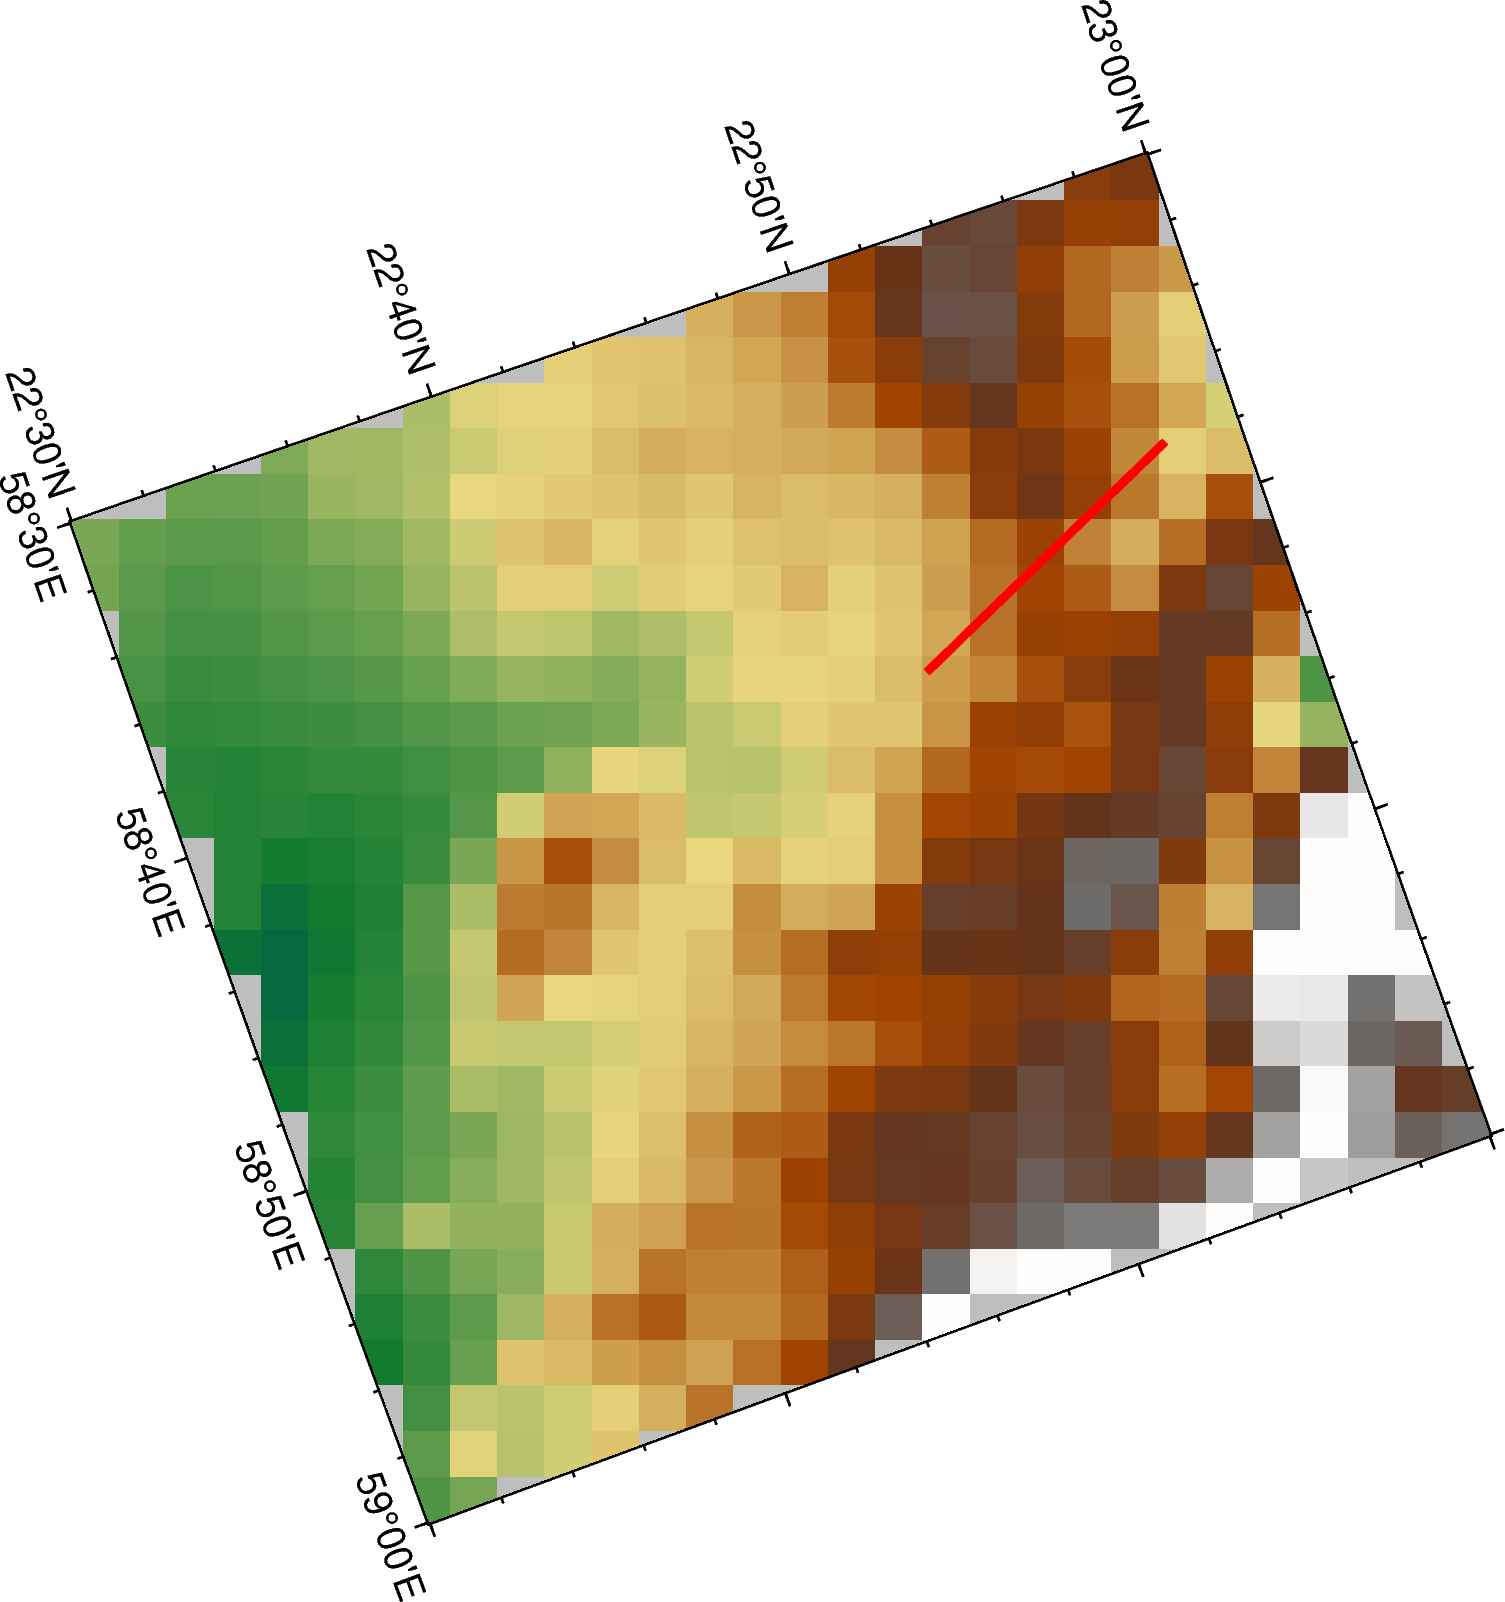

In [20]:
import pygmt

# Set the region of the main figure
 # (22.8813°N, 58.7006°E).
# region = [137.5, 141, 34, 37]
region = [58.5, 59, 22.5, 23]

fig = pygmt.Figure()

# Plot the base map of the main figure. Universal Transverse Mercator (UTM)
# projection is used and the UTM zone is set to be '54S'.
fig.basemap(region=region, projection='U54S/12c'
            , frame=['WSne', 'af']
           )
fig.grdimage(grid='@earth_relief_01m',)
# # Coordinates of the fault line
fault_start = (58 + 38/60, 22 + 58/60)  # (lon, lat) for (58°38', 22°58')
fault_end = (58 + 42/60, 22 + 50/60)      # (lon, lat) for (58°42', 22°50')

# # Coordinates of the points
# point1 = (58 + 38/60, 22 + 58/60)  # Point BA1A
# point2 = (58 + 42/60, 22 + 50/60)  # Point BA1D

# # Create a figure
# fig = pygmt.Figure()

# # Create a basemap with a satellite image
# fig.grdimage(
#     grid='@earth_relief_01m',  # You can change this to a suitable satellite image or any grid
#     projection='M6i',
#     region=(58.63, 58.70, 22.80, 22.55),
#     frame=True,
#     # projection='M6i'
# )

# # Plot the fault line
fig.plot(
    x=[fault_start[0], fault_end[0]],  # x-coordinates (lon)
    y=[fault_start[1], fault_end[1]],  # y-coordinates (lat)
    pen='2p,red'
)
fig.show()

In [21]:
!pip install matplotlib geopandas contextily Pillow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 1.1 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.9/83.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 3.0 MB/s eta 0:00:00


In [24]:
import contextily as ctx
print(ctx.providers.keys())

dict_keys(['OpenStreetMap', 'MapTilesAPI', 'OpenSeaMap', 'OPNVKarte', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Stadia', 'Thunderforest', 'BaseMapDE', 'CyclOSM', 'Jawg', 'MapBox', 'MapTiler', 'TomTom', 'Esri', 'OpenWeatherMap', 'HERE', 'HEREv3', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'GeoportailFrance', 'OneMapSG', 'USGS', 'WaymarkedTrails', 'OpenAIP', 'OpenSnowMap', 'AzureMaps', 'SwissFederalGeoportal', 'TopPlusOpen', 'Gaode', 'Strava', 'OrdnanceSurvey'])


AttributeError: Stamen

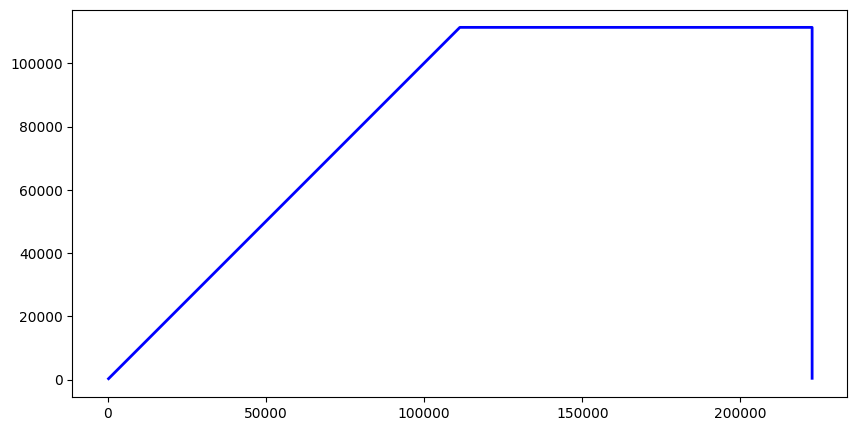

In [26]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import LineString

# Create a GeoDataFrame for the line
line_coords = [(0, 0), (1, 1), (2, 1), (2, 0)]  # Example coordinates for the line
line = LineString(line_coords)
gdf_line = gpd.GeoDataFrame(geometry=[line], crs='EPSG:4326')

# Create a base figure
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the GeoDataFrame line on the map
gdf_line.to_crs(epsg=3857).plot(ax=ax, color='blue', linewidth=2)

# Add a high-resolution satellite image
# ctx.add_basemap(ax, source=ctx.providers.Stamen.Terrain, zoom=10)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=10)

# Set labels and title
plt.title('Map with a Line Plot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Save the figure as a PDF
plt.savefig('map_with_line.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()
